<a href="https://colab.research.google.com/github/Avishek2020/LSTM-For-Time-Series/blob/main/TimeSeries_SineWave_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import matplotlib.pyplot as plt

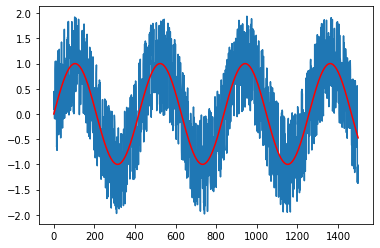

In [38]:
np.random.seed(0)
t=np.arange(0,1500)
x=np.sin(0.015*t) + np.random.uniform(low=-1, high=1, size=(1500,))
plt.plot(x)

x_without_noise = np.sin(0.015*t)
plt.plot(x_without_noise, color='red')

In [39]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler(feature_range=(0, 1))
x = (np.reshape(x, (-1, 1)))
x = normalizer.fit_transform(x)
print(x)

[[0.53046776]
 [0.61911792]
 [0.56562058]
 ...
 [0.19383459]
 [0.1547965 ]
 [0.24593019]]


In [40]:
train = x[0:1000]
test = x[1000:]
print(train.shape)

(1000, 1)


In [41]:
def createDataset(data, step):
    X, Y =[], []
    for i in range(len(data)-step): 
        X.append(data[i:i+step])
        Y.append(data[i+step])
    return np.array(X), np.array(Y)
 
step = 3
trainX,trainY = createDataset(train,step)
testX,testY   = createDataset(test,step)
print(trainX[0])

[[0.53046776]
 [0.61911792]
 [0.56562058]]


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [43]:
model = Sequential()
model.add(LSTM(units=16, activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX,trainY, epochs=500, batch_size=16, verbose=2)

Epoch 1/500
63/63 - 2s - loss: 0.1767
Epoch 2/500
63/63 - 0s - loss: 0.0336
Epoch 3/500
63/63 - 0s - loss: 0.0314
Epoch 4/500
63/63 - 0s - loss: 0.0300
Epoch 5/500
63/63 - 0s - loss: 0.0293
Epoch 6/500
63/63 - 0s - loss: 0.0287
Epoch 7/500
63/63 - 0s - loss: 0.0283
Epoch 8/500
63/63 - 0s - loss: 0.0280
Epoch 9/500
63/63 - 0s - loss: 0.0279
Epoch 10/500
63/63 - 0s - loss: 0.0278
Epoch 11/500
63/63 - 0s - loss: 0.0279
Epoch 12/500
63/63 - 0s - loss: 0.0278
Epoch 13/500
63/63 - 0s - loss: 0.0278
Epoch 14/500
63/63 - 0s - loss: 0.0278
Epoch 15/500
63/63 - 0s - loss: 0.0278
Epoch 16/500
63/63 - 0s - loss: 0.0279
Epoch 17/500
63/63 - 0s - loss: 0.0277
Epoch 18/500
63/63 - 0s - loss: 0.0278
Epoch 19/500
63/63 - 0s - loss: 0.0277
Epoch 20/500
63/63 - 0s - loss: 0.0276
Epoch 21/500
63/63 - 0s - loss: 0.0278
Epoch 22/500
63/63 - 0s - loss: 0.0277
Epoch 23/500
63/63 - 0s - loss: 0.0277
Epoch 24/500
63/63 - 0s - loss: 0.0276
Epoch 25/500
63/63 - 0s - loss: 0.0276
Epoch 26/500
63/63 - 0s - loss: 0.

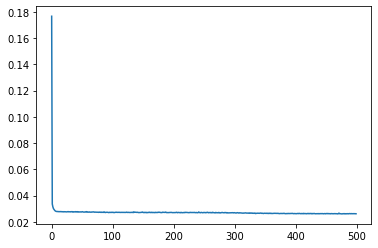

In [44]:
import matplotlib.pyplot as plt
 
loss = history.history['loss']
 
plt.plot(loss)

In [45]:
trainPredict = normalizer.inverse_transform(model.predict(trainX))
testPredict= normalizer.inverse_transform(model.predict(testX))
predicted= np.concatenate((trainPredict,testPredict))
x = normalizer.inverse_transform(x)

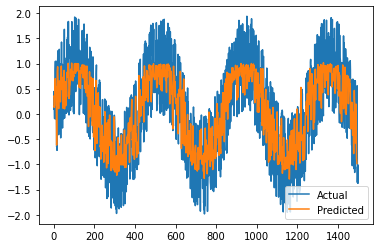

In [51]:
plt.plot(x, label='Actual')
plt.plot(predicted, label='Predicted')
plt.legend()
#plt.axvline(len(trainX), c="r")